In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df=pd.read_csv("Mall_Customers.csv")

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.shape

(200, 5)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [40]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [41]:
sns.pairplot(df.iloc[:,1:],height=2,aspect=2,hue='Gender')

In [29]:
from sklearn.preprocessing import StandardScaler

In [43]:
X = df.iloc[:, 2:]
scaler = StandardScaler()
X = scaler.fit_transform(X)

gender = df['Gender']
df = pd.DataFrame(X, columns=['age', 'income', 'score'])
df['Gender'] = gender

In [44]:
df.head()

,age,income,score,Gender
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male
2,-1.352802,-1.700830,-1.715913,Female
3,-1.137502,-1.700830,1.040418,Female
4,-0.563369,-1.662660,-0.395980,Female


<AxesSubplot:xlabel='age', ylabel='score'>

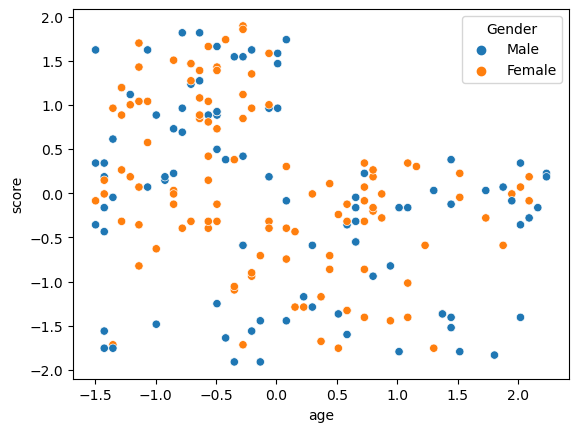

In [50]:
sns.scatterplot(data=df, x='age', y='score', hue='Gender')

### Segregation of Age vs Score

Cluster 0: 23 Customers
Cluster 1: 57 Customers
Cluster 2: 37 Customers
Cluster 3: 25 Customers
Cluster 4: 20 Customers
Cluster 5: 38 Customers


(-2.0, 4.0)

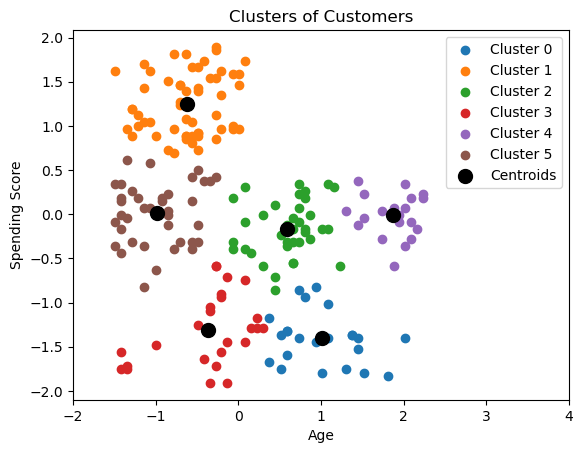

In [57]:
k=6
kmeans = KMeans(n_clusters=k)

X = df[['age', 'score']].to_numpy()
kmeans.fit(X)

labels = kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_

for idx in range(k):
    clust_i = labels==idx
    print("Cluster {}: {} Customers".format(idx, sum(clust_i)))

    plt.scatter(X[clust_i, 0], X[clust_i, 1], label='Cluster {}'.format(idx))
    
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

plt.xlim(-2, 4)


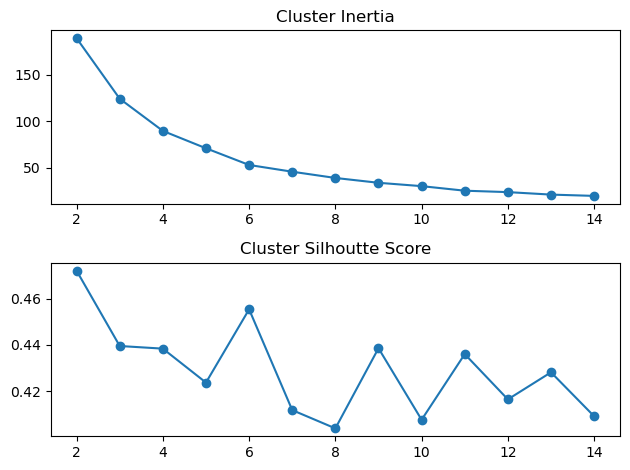

In [58]:
from sklearn.metrics import silhouette_score
inertia = []
sil_score = []

max_k=15
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    inertia.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    s_score = silhouette_score(X, cluster_labels)
    sil_score.append(s_score)
    
plt.subplot(2,1, 1)
plt.plot(np.arange(2, max_k), inertia, 'o-')
plt.title('Cluster Inertia')

    
plt.subplot(2,1, 2)
plt.plot(np.arange(2, max_k), sil_score, 'o-')
plt.title('Cluster Silhoutte Score')
plt.tight_layout()

### Segregation of Income Vs Spending Score

Cluster 0: 22 Customers
Cluster 1: 35 Customers
Cluster 2: 81 Customers
Cluster 3: 39 Customers
Cluster 4: 23 Customers


(-2.0, 4.0)

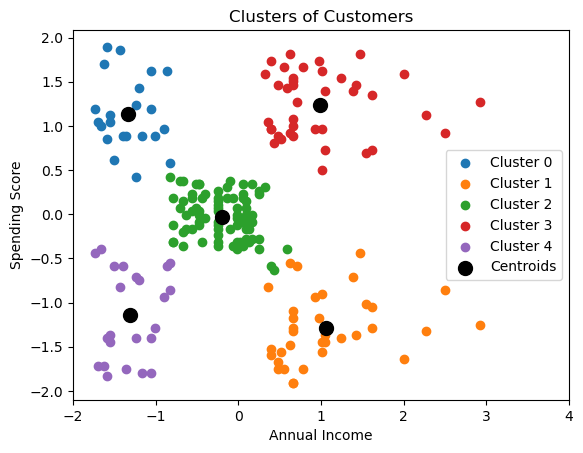

In [59]:
k=5
kmeans = KMeans(n_clusters=k)

X = df[['income', 'score']].to_numpy()
kmeans.fit(X)

labels = kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_

for idx in range(k):
    clust_i = labels==idx
    print("Cluster {}: {} Customers".format(idx, sum(clust_i)))

    plt.scatter(X[clust_i, 0], X[clust_i, 1], label='Cluster {}'.format(idx))
    
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

plt.xlim(-2, 4)

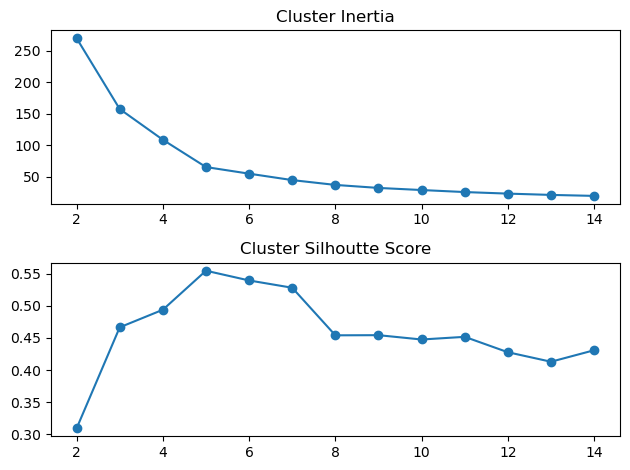

In [60]:
from sklearn.metrics import silhouette_score
inertia = []
sil_score = []

X = df[['income', 'score']].to_numpy()
max_k=15
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    inertia.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    s_score = silhouette_score(X, cluster_labels)
    sil_score.append(s_score)
    
plt.subplot(2,1, 1)
plt.plot(np.arange(2, max_k), inertia, 'o-')
plt.title('Cluster Inertia')

    
plt.subplot(2,1, 2)
plt.plot(np.arange(2, max_k), sil_score, 'o-')
plt.title('Cluster Silhoutte Score')
plt.tight_layout()